In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<div style = "border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output. Or better yet, avoid overly long output altogether.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>

In [78]:
# RUN THIS CELL
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import time

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [5 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [20 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)


- [**PART 2 [50 pts]: Analysis of Simulated ASEC Data**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 4:   Investigating trends [30 pts]](#part4questions)
  - [Question 5:  Calculate the Gini coefficient [10 pts]](#part5questions)
  - [Question 6:  Critiquing the simulated data [10 pts]](#part6questions)


## About this homework

This assignment is the first in which we'll go through the process of loading a dataset, splitting it into train and test sets, performing some preprocessing, and finally fitting some models and evaluating our results.

We have two different datasets:
- [**PART 1**](#part1) car data from [cardekho.com](https://www.cardekho.com/)
- [**PART 2**](#part2) *simulated* income data created from the [Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html)

Part 1 explores two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

Part 2 is focused EDA and visualization.

<a id="part1"></a>
    
# PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [5 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Identify all variables in the dataset. For each variable, state whether you consider it to be quantitative or categorical and briefly justify your choices. 

Columns: 
- Year ---> quantitative. From 2003 to 2018
- Current_Selling_Price ---> quantitative. Mean 4.39, 
- MRP ---> quantitative. Mean 6.91
- Kms_Driven ---> quantitative. Mean 33,718

In [18]:
# your code here
df_car = pd.read_csv("data/car_dekho_full.csv")
df_car.columns = df_car.columns.str.lower()

np.float64(33718.74542429284)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

The MRP --- the maximum retail price of the car when it was new --- seems to be the best predictor. If you look at all the plots, there seems to be the clearest correlation between mrp and current_selling_price. The other variables are less correlated. The correlation coefficient between mrp and current_selling_price is 0.89, which indicates a strong correlation, and suggests mrp is a good predictor. This makes sense, because mrp was the original price, so that should be quite predictive of the current price.

0.8878283411409841


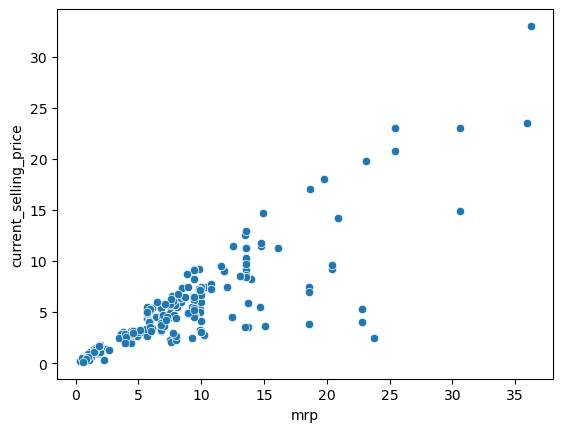

In [23]:
sns.scatterplot(x='mrp', y='current_selling_price', data=df_car)
print(df_car['mrp'].corr(df_car['current_selling_price']))

<Axes: xlabel='kms_driven', ylabel='current_selling_price'>

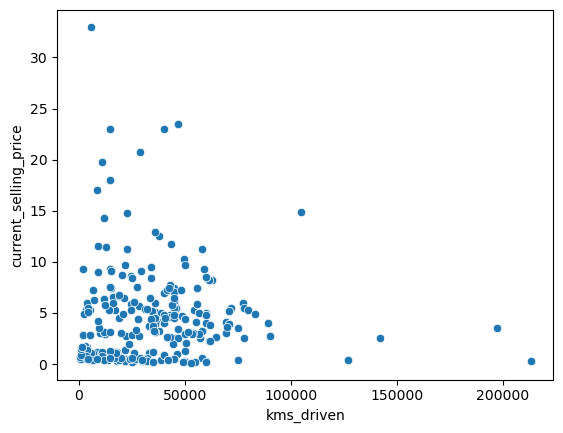

In [21]:
sns.scatterplot(x='kms_driven', y='current_selling_price', data=df_car)

<Axes: xlabel='year', ylabel='current_selling_price'>

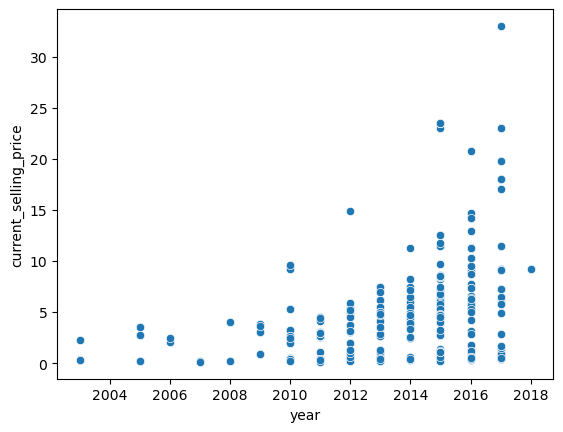

In [22]:
sns.scatterplot(x='year', y='current_selling_price', data=df_car)

<!-- END QUESTION -->

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [20 pts]</b></div>

[Return to contents](#contents)

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

<div class='exercise'><b>Q2.1</b></div>

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [26]:
random_state = 109

# set X and y
X = df_car.drop("current_selling_price", axis=1)
y = df_car["current_selling_price"]
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

In [31]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2</b></div>

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.1</b></div>

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

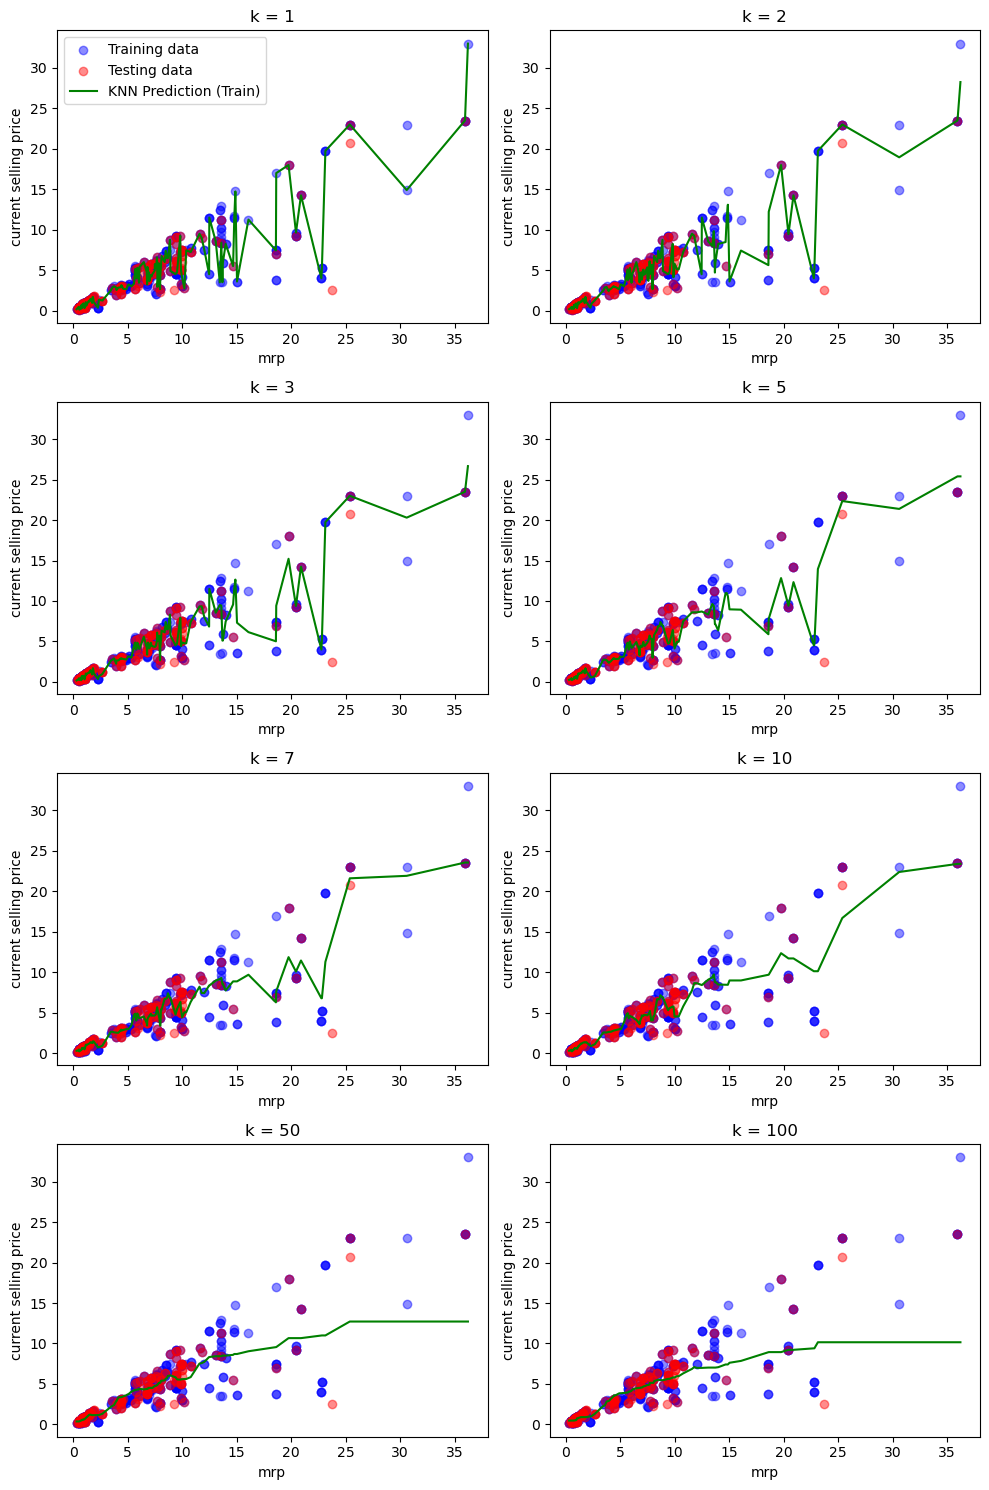

In [69]:
# iterate over the set of k
k_set = [1,2,3,5,7,10,50,100]

# lists to store train / test MSEs
train_mses = []
test_mses = []

# create figure
fig, axes = plt.subplots(4, 2, figsize=(10, 15), sharey=False)
axes = axes.flatten()

for i, k in enumerate(k_set):
    # Train KMeans
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train[["mrp"]], y_train)

    # Predict on training and testing data
    y_train_pred = knn.predict(X_train[["mrp"]])
    y_test_pred = knn.predict(X_test[["mrp"]])
    
    # store train / test mses
    train_mses.append(mean_squared_error(y_train, y_train_pred))
    test_mses.append(mean_squared_error(y_test, y_test_pred))
    
    # sort data
    X_train_sorted = X_train["mrp"].values.flatten()[np.argsort(X_train["mrp"].values.flatten())]
    y_train_pred_sorted = y_train_pred[np.argsort(X_train["mrp"].values.flatten())]

    # Plot the results on corresponding subplot
    axes[i].scatter(X_train[["mrp"]], y_train, color='blue', alpha=0.45, label='Training data')
    axes[i].scatter(X_test[["mrp"]], y_test, color='red', alpha=0.45, label='Testing data')
    axes[i].plot(X_train_sorted, y_train_pred_sorted, color='green', label='KNN Prediction (Train)')

    # labels
    axes[i].set_xlabel('mrp')
    axes[i].set_ylabel('current selling price')
    axes[i].set_title(f"k = {k}")
    
axes[0].legend()
plt.tight_layout()
plt.show()
    
    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.2</b></div>

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).

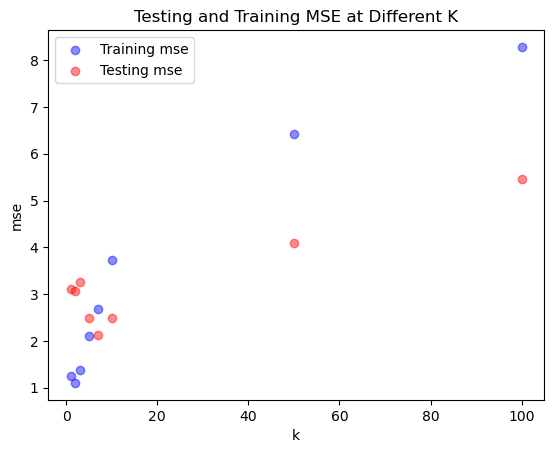

In [72]:
plt.scatter(k_set, train_mses, color = "blue", alpha = 0.45, label='Training mse')
plt.scatter(k_set, test_mses, color = "red", alpha = 0.45, label='Testing mse')
plt.xlabel('k')
plt.ylabel('mse')
plt.title("Testing and Training MSE at Different K")
plt.legend()
plt.show()



<!-- END QUESTION -->

<div class='exercise'><b>Q2.2.3</b></div>

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.

In [75]:
# your code here
best_mse = np.min(test_mses)
best_idx = np.argmin(test_mses)
best_k = k_set[best_idx]

In [76]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 2.129.


In [77]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

<div class='exercise'><b>Q2.2.4</b></div>

Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.

In [81]:
# function to get model metrics
def get_metrics(model, name: str, data: tuple) -> dict:
    '''
    Parameters
    ----------
    model : (sklearn estimator) This is your fitted sklearn model
    name : (str) A name to represent your model
    data : (tuple) contains train and test split for x and y

    Returns:
    metrics : (dict) should have entries for:
             name, train_mse, test_mse, r2_train, and r2_test
    '''
    x_train, x_test, y_train, y_test = data
    d = {}
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    d['name'] = name
    d['train_mse'] = mean_squared_error(y_train, y_hat_train)
    d['test_mse'] = mean_squared_error(y_test, y_hat_test)
    d['r2_train'] = r2_score(y_train, y_hat_train)
    d['r2_test'] = r2_score(y_test, y_hat_test)
    return d

In [87]:
# fit the best model
# fit the best model
best_knn = KNeighborsRegressor(n_neighbors=best_k).fit(X_train[["mrp"]], y_train)
metrics = get_metrics(best_knn, f'kNN (k={best_k})', (X_train[["mrp"]], X_test[["mrp"]], y_train, y_test))
best_r2 = metrics["r2_test"]

In [88]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=7 is 0.8678.


In [89]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

<div class='exercise'><b>Q3.1</b></div>

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

<div class='exercise'><b>Q3.1.1</b></div>

Fit a linear regression model. Name your model `linreg`.

In [90]:
# your code here
linreg = LinearRegression().fit(X_train[["mrp"]], y_train)


In [91]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

<div class='exercise'><b>Q3.1.2</b></div>

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

In [102]:
# your code here
slope = linreg.coef_.item()
intercept = linreg.intercept_.item()

In [103]:
print(
    f"Intercept of the fitted linear model\t\t{intercept:.4f}\n"
    f"Slope of the fitted linear model\t{slope:.4f}"
)

Intercept of the fitted linear model		0.1124
Slope of the fitted linear model	0.6157


In [104]:
grader.check("q3.1.2")

q3.1.2 results: All test cases passed!

<div class='exercise'><b>Q3.1.3</b></div>

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

In [108]:
linear_metrics = get_metrics(linreg, f"mrp vs current price", (X_train[["mrp"]], X_test[["mrp"]], y_train, y_test))
linear_metrics
#Compute the MSE of the model
lin_train_mse = linear_metrics["train_mse"]
lin_test_mse = linear_metrics["test_mse"]
#Compute the R-squared of the model
lin_test_r2 = linear_metrics["r2_test"]

In [109]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


In [110]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1.4</b></div>

Create the following 3 plots:
- Plot the **regression line** along with the **training data**.
- Plot the **residuals** of the model on the **training** set as a function of the **predictor** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a the **distribution** of the **residuals** on the **training** set.

As always, your plots should be well-labeled.

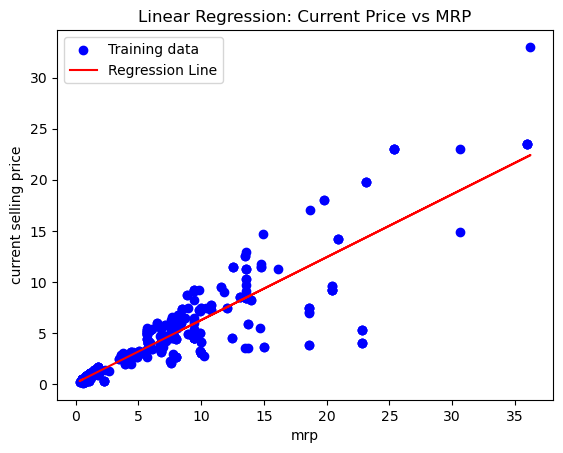

In [116]:
# Plot #1: Regression line along with the training data
y_pred = linreg.predict(X_train[["mrp"]])

plt.scatter(X_train[["mrp"]], y_train, color = "blue", label = "Training data")
plt.plot(X_train[["mrp"]], y_pred, color= "red", label = "Regression Line")
plt.xlabel("mrp")
plt.ylabel("current selling price")
plt.title("Linear Regression: Current Price vs MRP")
plt.legend()
plt.show()

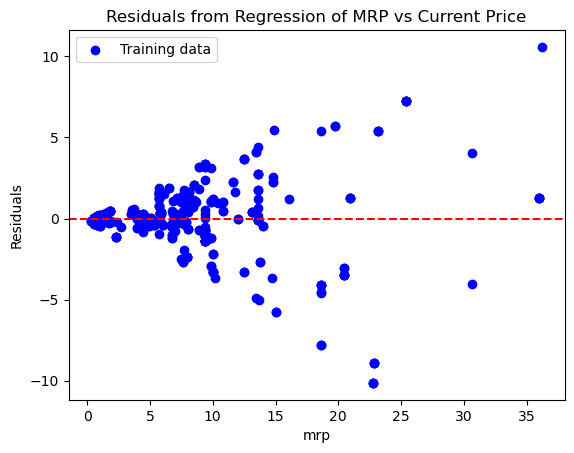

In [120]:
# Plot #2: Residuals as a function of the predicted value
residuals = y_train - y_pred

plt.scatter(X_train["mrp"], residuals, color = "blue", label = "Training data")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("mrp")
plt.ylabel("Residuals")
plt.title("Residuals from Regression of MRP vs Current Price")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals of Training Set')

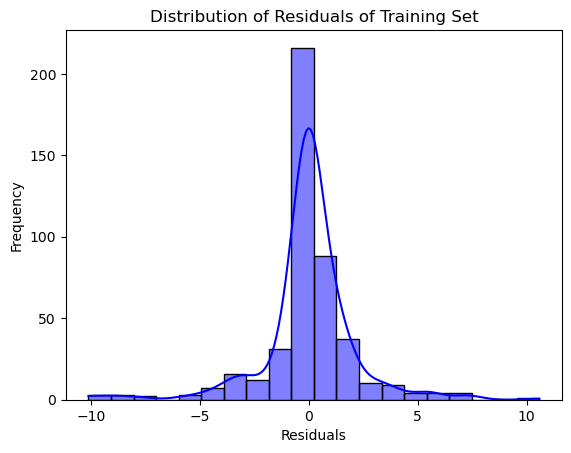

In [122]:
# Plot #3: Distribution of residuals
sns.histplot(residuals, kde=True, bins=20, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals of Training Set')

<!-- END QUESTION -->

<div class='exercise'><b>Q3.2</b></div>
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.1</b></div>

A linear regression model makes four important assumptions. For each assumption, describe how one or more of the plots in the previous question may provide evidence that (1) the assumption holds, (2) that the assumption is violated, or (3) that none of the plots have any bearing on the assumption. 

**Note:** Don't over-think this question! You are just being asked to use the plots above to check the four assumptions and to explain your reasoning.

Assumption 1: f is a linear form. The first graph checks this. The scatterplot shows that it isn't quadratic or exponential or anything funky.

Assumption 2: homoskedastic errors. The second graph shows that this assumption is violated. The spread of the errors increases as the predictor increases. It shouldn't actually matter much, though. It will affect the standard error estimates, which are not heterskedastic robust.

Assumption 3: errors normally distributed. The third graph checks this. It seems like a roughly normal distribution, though there appears to be some wonkyness around the -3 mark, but that could just be noise.

Assumption 4: errors i.i.d. The residuals appear to be independent from plot #2, but it is hard to check this. Need to do a lot more tests to figure out whether they are truly nonrandom / structured. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.2</b></div>

Based on what you have seen in the preceding questions, which model would you select as the best and why? Might you have any reason to doubt your choice? Why or why not?

**Hint:** There were more than just 2 candidate models.

[FILL LATER]

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [50 pts]: Analysis of 2024 US Annual Social and Economic (ASEC) Supplement

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2024 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4: Investigating trends [30 pts]</b></div>

[Return to contents](#contents)

Below we'll answer questions about potential trends in the data with the help of plots and/or simple statistics. Your goal should be to communicate your findings clearly. So be sure to provide an interpretation with your visualizations or other output.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

_Type your answer here, replacing this text._

In [ ]:
# your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining the numerical ordering in the dataset might be preferable to education level as a categorical variable lacking order. 

_Type your answer here, replacing this text._

In [ ]:
# your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Is there a clear trend between age and income?

_Type your answer here, replacing this text._

In [ ]:
# your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

_Type your answer here, replacing this text._

In [ ]:
# your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.5</b></div>

What is the average effect of the `military_service` variable on income?

_Type your answer here, replacing this text._

In [ ]:
# your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.6</b></div>

Propose a question of your own that you would like to explore in the data. Create a visualization to help you answer this question and provide an interpretation of your findings.

_Type your answer here, replacing this text._

In [ ]:
# your code here

<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient [10 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

<div class='exercise'><b>Q5.1</b></div>

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

In [ ]:
# your code here
gini_coef = ...

In [ ]:
# Print resulting Gini coefficient
print(f"The Gini Index for this dataset is {gini_coef:.3f}")

In [ ]:
grader.check("q5.1")

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Critiquing the simulated data [10 pts]</b></div>

[Return to contents](#contents)

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

> **Note**: The rubric below is provided for transparency. Please ensure your responses are genuine and thoughtful, rather than simply attempting to "fit" the rubric.
---
<details>
<summary><b>Click to view the Q6 Critique Rubric</b></summary>
    
### Q6 Critique Rubric:

**Total Points: 10**

#### 1. Relevance of Comments (4 points):
- **4 points**: The critique directly addresses specific sections or steps in the preprocessing notebook, demonstrating a thorough understanding of the content.
- **3 points**: The critique references multiple sections of the notebook with some specificity.
- **2 points**: The critique generally addresses the notebook but may lack specific references to steps or sections.
- **1 point**: The critique provides only a cursory overview without specific details.
- **0 points**: The critique does not address the preprocessing notebook.

#### 2. Depth of Analysis (4 points):
- **4 points**: The student provides deep insights, identifies potential pitfalls, or suggests meaningful improvements for multiple sections of the notebook.
- **3 points**: The student provides valuable feedback for one section or multiple but less detailed feedback for several sections.
- **2 points**: The analysis is somewhat detailed but may lack depth or actionable feedback.
- **1 point**: The feedback is generic or surface-level.
- **0 points**: No meaningful analysis provided.

#### 3. Clarity and Organization (2 points):
- **2 points**: The critique is well-organized, clear, and easy to follow.
- **1 point**: The critique is somewhat organized but may have unclear sections.
- **0 points**: The critique is disorganized or difficult to understand.

---

Remember to provide specific examples or suggestions whenever possible. General statements without backing evidence or examples will not be as valuable as those with clear references and reasoning.

</details>


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

In [ ]:
hours_spent_on_hw = ...

In [ ]:
grader.check("wrapup")

In [ ]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

🌈 **This concludes HW2. Thank you!**

[Return to contents](#contents)